In [57]:
import time
from sklearn.datasets import make_classification
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [58]:
def boundary_construction_timing(x,y):
    positive_latents=x[y.T==1,:]
    negative_latents=x[y.T==0,:]

    time_start=time.time()
    pairs_from_positive=[]
    negative_idxs=[]

    for k in range(positive_latents.shape[0]):
        positive_latent=positive_latents[k,:]
        distances=np.zeros(negative_latents.shape[0])
        for l in range(negative_latents.shape[0]):
            distances[l]=np.linalg.norm(positive_latent-negative_latents[l,:])
        pairs_from_positive.append([k,distances.argmin()])
        negative_idxs.append(distances.argmin())

    negative_idxs=list(set(negative_idxs))

    positive_idxs=[]
    pairs_from_negative=[]

    for k in range(negative_latents.shape[0]):
        negative_latent=negative_latents[k,:]
        distances=np.zeros(positive_latents.shape[0])
        for l in range(positive_latents.shape[0]):
            distances[l]=np.linalg.norm(negative_latent-positive_latents[l,:])
        pairs_from_negative.append([distances.argmin(),k])
        positive_idxs.append(distances.argmin())

    positive_idxs=list(set(positive_idxs))

    pairs=[]

    for pair in pairs_from_positive:
        if pair[0] in positive_idxs:
            pairs.append(pair)
        
    for pair in pairs_from_negative:
        if pair[1] in negative_idxs:
            if not(pair in pairs):
                pairs.append(pair)
    time_end=time.time()
    return time_end-time_start

In [62]:
class_sample_sizes=np.concatenate((np.arange(20,100,20),np.arange(100,500,50),np.arange(500,1000,250),np.arange(1000,2000,500),np.arange(2000,3001,1000)))
dimensions=[2,4,8,16,32,64,256,512,1024]
pbar=tqdm(dimensions)
for dimension in pbar:
    construction_times=np.zeros(len(class_sample_sizes))
    for k,num_images_per_class in enumerate(class_sample_sizes):
        pbar.set_description(f'Dimension {dimension}, {num_images_per_class} per class')
        data=make_classification(int(num_images_per_class*2),n_features=dimension,n_informative=dimension,n_redundant=0,n_classes=2,class_sep=4)
        x=data[0]
        y=data[1]
        construction_times[k]=boundary_construction_timing(x,y)
    np.save(f'outputs/timings_{dimension}.npy',construction_times)
np.save('outputs/class_sample_sizes.npy',class_sample_sizes)

Dimension 1024, 3000 per class: 100%|██████████| 9/9 [48:42<00:00, 324.74s/it]


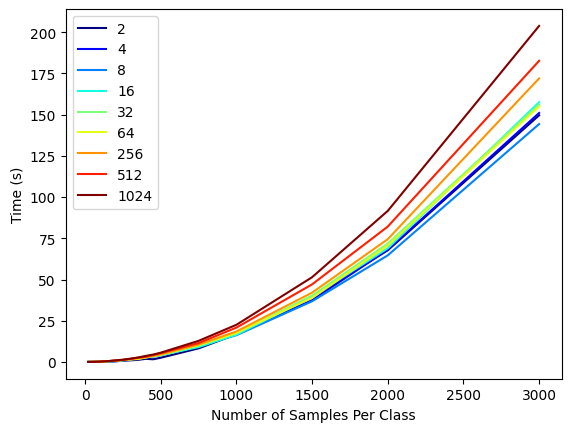

In [63]:
colors=plt.cm.jet(np.linspace(0,1,len(dimensions)))
class_sample_sizes=np.load('outputs/class_sample_sizes.npy')
for n,dimension in enumerate(dimensions):
    timings=np.load(f'outputs/timings_{dimension}.npy')
    plt.plot(class_sample_sizes,timings,label=str(dimension),color=colors[n])
plt.legend()
plt.xlabel('Number of Samples Per Class')
plt.ylabel('Time (s)')
plt.show()

(9, 18)


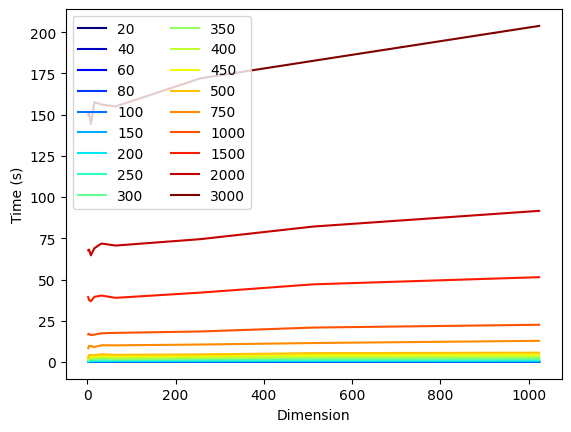

In [74]:
class_sample_sizes=np.load('outputs/class_sample_sizes.npy')
colors=plt.cm.jet(np.linspace(0,1,len(class_sample_sizes)))
dimensions=[2,4,8,16,32,64,256,512,1024]
for n,dimension in enumerate(dimensions):
    if n==0:
        aggregated_timings=np.expand_dims(np.load(f'outputs/timings_{dimension}.npy'),0)
    else:
        aggregated_timings=np.concatenate((aggregated_timings,np.expand_dims(np.load(f'outputs/timings_{dimension}.npy'),0)))
print(aggregated_timings.shape)
for n,class_sample_size in enumerate(class_sample_sizes):
    plt.plot(dimensions,aggregated_timings[:,n],color=colors[n],label=str(class_sample_size))
plt.legend(ncols=2,loc='upper left')
plt.xlabel('Dimension')
plt.ylabel('Time (s)')
plt.show()